In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


data = pd.read_csv('../data/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [72]:
data.value_counts('quality')

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [73]:
# INDEPENDENT & DEPENDENT VARIABLE
x = data.iloc[:, 0:11].values
y = data.iloc[:, [11]].values.ravel()

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [75]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(x_train, y_train)
y_predict = naive_bayes.predict(x_test)

Akurasi Test  0.6153846153846154
akurasi :  0.6153846153846154
F1 Score (Inti) : 0.6142757592058291
Precision : 0.6251037200279773


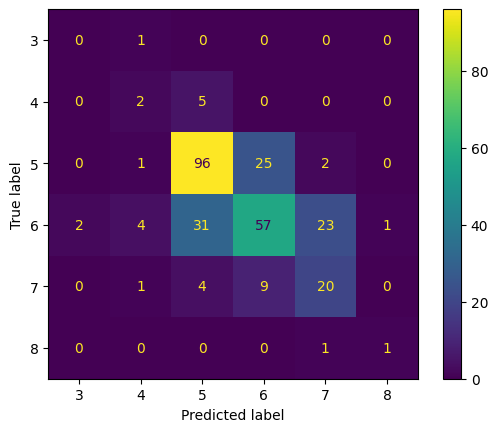

In [76]:
print("Akurasi Test ", accuracy_score(y_test, y_predict))
report_data = (classification_report(y_test, y_predict, zero_division=0, output_dict=True))
accuracy = report_data['accuracy']
f1_weighted = report_data['weighted avg']['f1-score']
precision = report_data['weighted avg']['precision']
print(f"akurasi :  {accuracy}")
print(f"F1 Score (Inti) : {f1_weighted}")
print(f"Precision : {precision}")
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [77]:
# TEST DECISION TREE New Data
# fn = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar	chlorides',	'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol','quality']
 
input_data = [
    # data 1
    [7.4, 0.35, 0.40, 2.4, 0.070, 15.0, 35.0, 0.9960, 3.20, 0.70, 11.5],
    
    # data 2
    [0, 10, 67, 175, 95, 12, 80.0, 0.9980, 3.15, 0.55, 9.4]
]
predict_new_data = naive_bayes.predict(input_data)
print("prediksi data baru, quality ",  predict_new_data[0] ,'&',predict_new_data[1])



prediksi data baru, quality  7 & 3
